In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix, confusion_matrix
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter('ignore')

# Importing the dataset

In [20]:
df = pd.read_csv('/Users/Yousef/Downloads/kidney_disease.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Yousef/Downloads/kidney_disease.csv'

## Understanding the description  dataset

In [ ]:
desc/dic/ 

In [ ]:
df.head()

In [ ]:
df.shape

In [4]:
df.info()

NameError: name 'df' is not defined

In [5]:
#find all unique value for all columns 
for i in df.drop("id",axis=1).columns:
    print('unique values in "{}":\n'.format(i),df[i].unique())

NameError: name 'df' is not defined

In [6]:
#change theses columns from type folat to object 
df['su'] = df['su'].astype(str)
df['sg'] = df['sg'].astype(str)
df['al'] = df['al'].astype(str)

NameError: name 'df' is not defined

In [7]:
#change theses columns from type object to folat 
df['rc']  = pd.to_numeric(df['rc'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')

NameError: name 'df' is not defined

In [8]:
df['classification'] = df['classification'].replace(to_replace = 'ckd\t', value='ckd')
df['cad'] = df['cad'].replace(to_replace = '\tno', value='no')
df['dm'] = df['dm'].replace(to_replace = '\tno', value='no')
df['dm'] = df['dm'].replace(to_replace='\tyes',value='yes')
df['rc'] = df['rc'].replace(to_replace='\t?',value=np.nan)
df['wc'] = df['wc'].replace(to_replace='\t6200',value='6200')
df['wc'] = df['wc'].replace(to_replace='\t8400',value='8400')
df['wc'] = df['wc'].replace(to_replace='\t?',value=np.nan)
df['pcv'] = df['pcv'].replace(to_replace='\t?',value=np.nan)
df['pcv'] = df['pcv'].replace(to_replace='\t43',value='43')

NameError: name 'df' is not defined

In [9]:
# to check conversion 
df.info()

NameError: name 'df' is not defined

# Data Exploration

## Statistical analysis 

In [10]:
df.describe()

NameError: name 'df' is not defined

In [11]:
df.drop('id',axis=1).mode().head(1)

NameError: name 'df' is not defined

In [12]:
df.var()

NameError: name 'df' is not defined

In [13]:
import plotly.figure_factory as ff
df_corr = df.corr()
df_corr_round = df_corr.round(2)
fig = ff.create_annotated_heatmap(
            z=df_corr_round.to_numpy(),
            x=df_corr.columns.tolist(),
            y=df_corr.index.tolist(),
            showscale=True,
            hoverongaps=True,      
            )

fig.show()

NameError: name 'df' is not defined

In [14]:
# This cell to show what object feature have high correlation with classification
#Chi-squared test
df2 = df.select_dtypes('object')
from scipy.stats import chi2_contingency
factors_paired = [(i,j) for i in df2.columns.values for j in df2.columns.values] 

chi2, p_values =[], []

for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(df2[f[0]], df2[f[1]]))   
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:      # for same factor pair
        chi2.append(0)
        p_values.append(0)

chi2 = np.array(chi2).reshape((14,14)) # shape it as a matrix
chi2 = pd.DataFrame(chi2, index=df2.columns.values, columns=df2.columns.values) # then a df for convenience
chi2.corr()['classification'].sort_values(ascending=False)

NameError: name 'df' is not defined

In [15]:
df_corr = chi2.corr()
df_corr_round = df_corr.round(2)
fig = ff.create_annotated_heatmap(
            z=df_corr_round.to_numpy(),
            x=df_corr.columns.tolist(),
            y=df_corr.index.tolist(),
            showscale=True,
            hoverongaps=True,      
            )

fig.show()

NameError: name 'chi2' is not defined

In [16]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of numerical Features')
for ax, feats in zip(axes.flatten(), df.select_dtypes(include=['float64'])):
    sns.distplot(a=df[feats], ax=adf.var()x)

SyntaxError: invalid syntax (<ipython-input-16-e17737f09c78>, line 5)

In [17]:
#Continuious data outliers
df1 = df.dropna()
def outliers(df1,features):
    outlier_indices = []
    for i in features:

        Q1=np.percentile(df1[i],25) #1st quartile
        Q3=np.percentile(df1[i],75) #3rd quartile
        IQR=Q3-Q1                  #IQR
        outlier_step=IQR*1.5
        min_number = Q1-outlier_step
        max_number = Q3 + outlier_step
        # .shape[0] will print the length of outliers for coulmns
        outlier = df1[(df1[i]<min_number) | (df1[i]>max_number)][i].shape[0]
        if outlier != 0 :
            output = 'The feature' , i , 'has ' ,outlier , 'outlier' 
            outlier_indices.append(output)
            
        
    return outlier_indices
out = outliers(df1 , df1.select_dtypes(include=['float64']).columns)
out

NameError: name 'df' is not defined

## Visualization of the data

### Pairwise metix

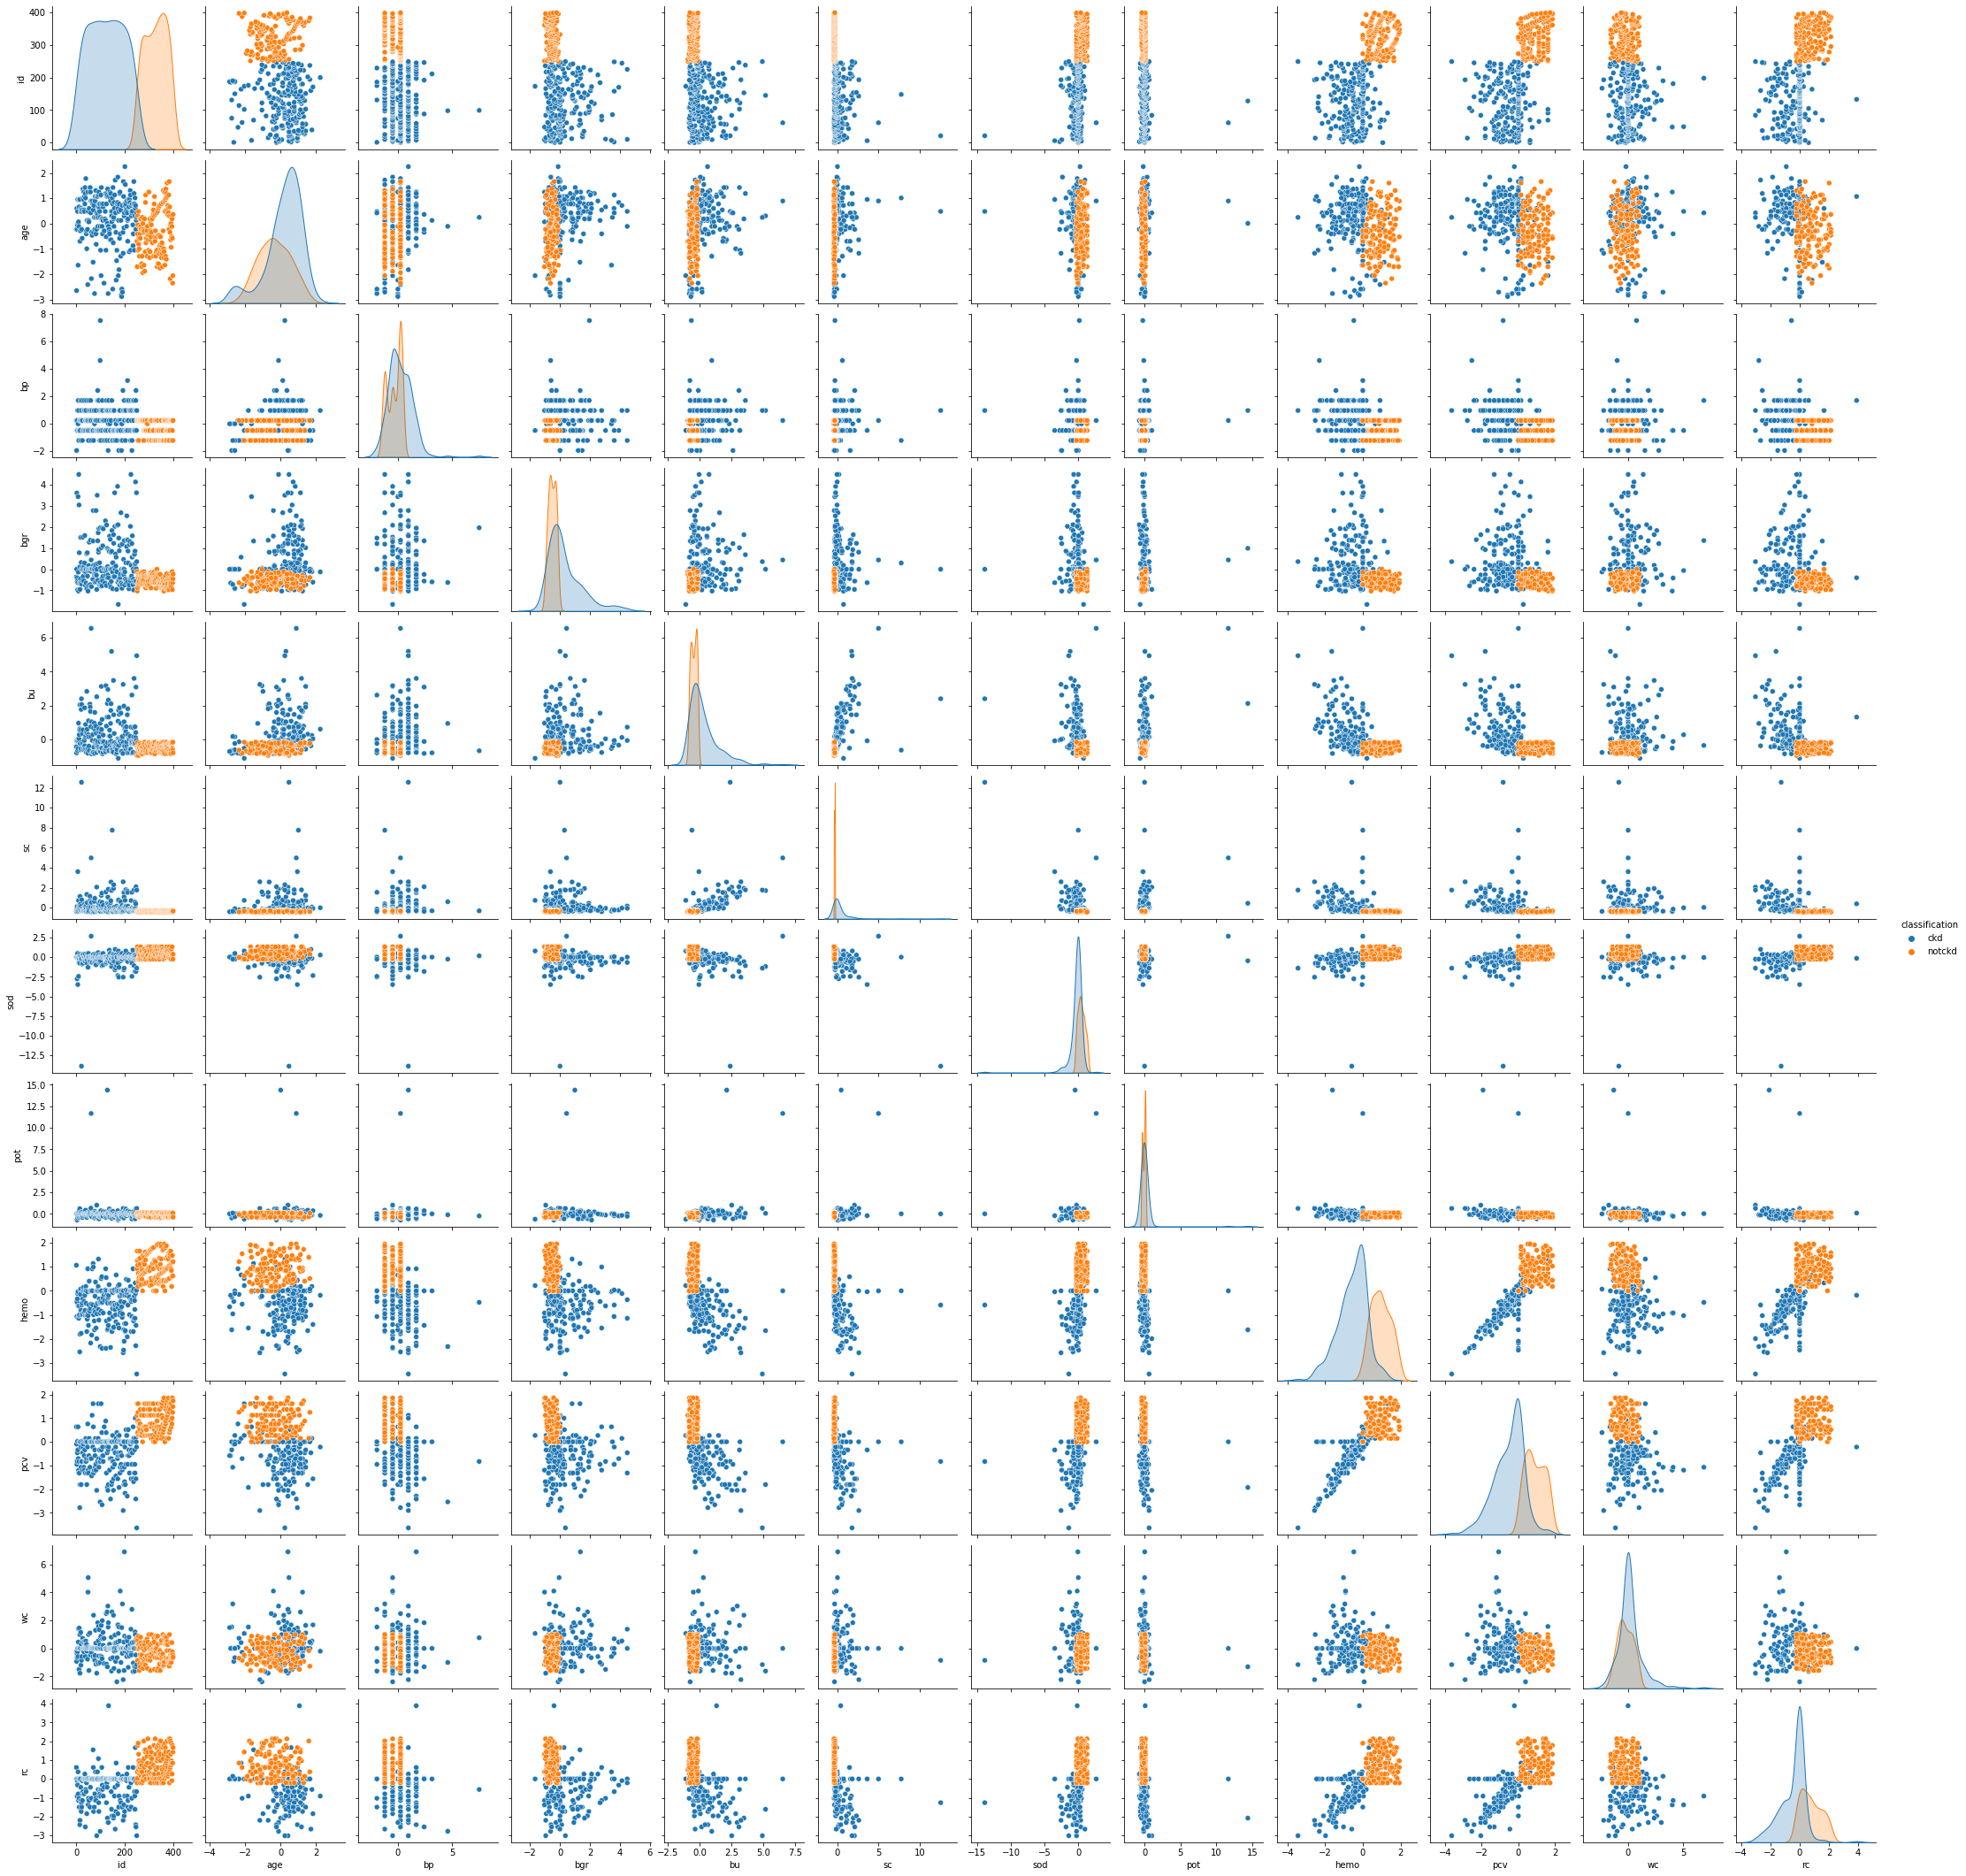

In [89]:
sns.pairplot(df,hue='classification')

### Bar charts

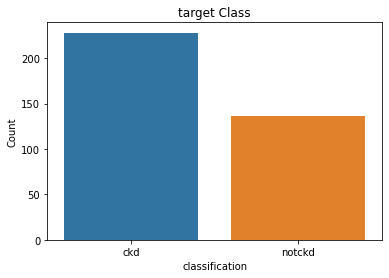

In [73]:
sns.countplot(x='classification',data=df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")
plt.show()

In [77]:
df1.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [110]:
df1['su'].unique()

array(['0.0', '3.0', '4.0', '1.0', nan, '2.0', '5.0'], dtype=object)

In [82]:
df1['su'] = df1['su'].replace(to_replace='nan',value=np.nan)

In [112]:
px.bar(df1, x="su", color='classification', barmode='group', template = 'plotly_dark', height = 400)

In [41]:
px.bar(df, x="ane", color='classification', barmode='group', template = 'plotly_dark', height = 400)

In [42]:
px.bar(df, x="pe", color='classification', barmode='group', template = 'plotly_dark', height = 400)

In [43]:
px.bar(df, x="ba", color='classification', barmode='group', template = 'plotly_dark', height = 400)

In [44]:
px.bar(df, x="rbc", color='classification', barmode='group', template = 'plotly_dark', height = 400)

### histograms

In [45]:
 px.histogram(df, x="hemo" , color = 'classification')

In [46]:
 px.histogram(df, x="pcv" , color = 'classification')

In [47]:
 px.histogram(df, x="rc" , color = 'classification')

In [48]:
 px.histogram(df, x="sod" , color = 'classification')

In [68]:
 px.histogram(df, x="sc" , color = 'classification')

### scatter plots



In [49]:
px.scatter(df, x="rc", y="hemo", color="classification")

In [50]:
px.scatter(df, x="rc", y="pcv", color="classification")

In [51]:
px.scatter(df, x="pcv", y="hemo", color="classification")

In [52]:
px.scatter(df, x="sod", y="sc", color="classification")

## Exploring missing values 

In [53]:
# Percentage of missing values
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

rbc               38.00
rc                32.75
wc                26.50
pot               22.00
sod               21.75
pcv               17.75
pc                16.25
hemo              13.00
bgr               11.00
bu                 4.75
sc                 4.25
bp                 3.00
age                2.25
ba                 1.00
pcc                1.00
cad                0.50
htn                0.50
dm                 0.50
appet              0.25
pe                 0.25
ane                0.25
id                 0.00
su                 0.00
al                 0.00
sg                 0.00
classification     0.00
dtype: float64

<Figure size 720x432 with 0 Axes>

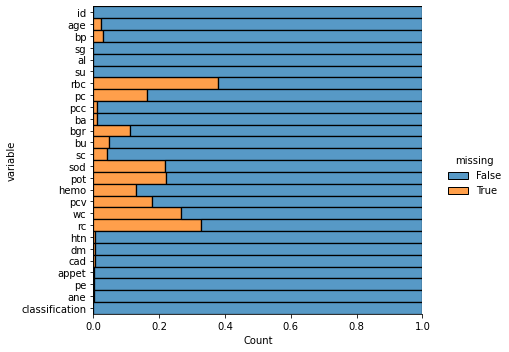

In [54]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

# Preprocessing analysis

## Dividing the data into attributes and labels

In [55]:
X = df.drop('classification',axis=1)
y = df['classification']

## Handling missing values 

In [56]:
#drop the null value for the coulms that contains less than 5 perecent 
df.dropna(axis=0, subset=['bu' ,'sc','age','ba','pcc','dm','cad','htn','appet','pe','ane'],inplace=True)

In [57]:
# Second Fill the the numerical columns with mean
for i in df.select_dtypes(include=['float64']) :
    df[i].fillna(df[i].mean(),inplace=True)

In [58]:
# Third Fill the category columns with mode
for i in df.select_dtypes(include=['object']) :
    df[i].fillna(df[i].mode()[0],inplace=True)

In [59]:
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

id                0.0
age               0.0
ane               0.0
pe                0.0
appet             0.0
cad               0.0
dm                0.0
htn               0.0
rc                0.0
wc                0.0
pcv               0.0
hemo              0.0
pot               0.0
sod               0.0
sc                0.0
bu                0.0
bgr               0.0
ba                0.0
pcc               0.0
pc                0.0
rbc               0.0
su                0.0
al                0.0
sg                0.0
bp                0.0
classification    0.0
dtype: float64

## Data Scaling (Normalization)

In [60]:
from sklearn.preprocessing import StandardScaler
df3 = df.copy()


ss = StandardScaler()
for i in df.select_dtypes(include=['float64']) :
    df[i] = ss.fit_transform(df[[i]])
   

df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,-0.225508,0.242343,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,0.632899,-0.237000,0.609452,yes,yes,no,good,no,no,ckd
1,1,-2.641501,-1.944901,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,-0.098665,-0.928440,0.000000,no,no,no,good,no,no,ckd
2,2,0.599465,0.242343,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,-0.952157,-0.352240,0.000000,no,yes,no,poor,no,yes,ckd
3,3,-0.225508,-0.486739,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,-0.830229,-0.659547,-0.909504,yes,no,no,poor,yes,yes,ckd
4,4,-0.048728,0.242343,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,-0.464447,-0.429067,-0.091605,no,no,no,good,no,no,ckd


In [61]:
from sklearn.preprocessing import LabelEncoder
df1 = df.copy()
la = LabelEncoder()
for i in df1.select_dtypes(include=['object']) :
    df1[i] = la.fit_transform(df1[[i]])
    
df1.head()
X = df1.drop('classification',axis=1)
y = df1['classification']

## Select the appropriate data splitting

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#for i in range(0.01,0.5,0.01)

# Modeling Phase

## Use the appropriate Classification or Prediction algorithm for the problem

[[47  1]
 [ 3 22]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        50
           1       0.88      0.96      0.92        23

    accuracy                           0.95        73
   macro avg       0.93      0.95      0.94        73
weighted avg       0.95      0.95      0.95        73



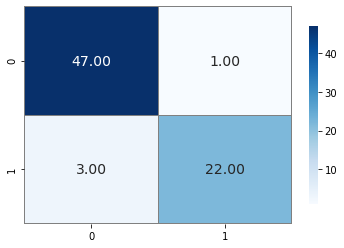

In [63]:
df4 = df3.copy()
la = LabelEncoder()
for i in df4.select_dtypes(include=['object']) :
    df4[i] = la.fit_transform(df4[[i]])    
X4 = df4.drop('classification',axis=1)
y4 = df4['classification']
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=2) 
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
matrix = confusion_matrix(y_test, preds, labels=y.unique(), normalize=None)
print(matrix)
sns.heatmap(matrix, annot=True,  
                  annot_kws={"size": 14},
                  fmt='.2f', cmap="Blues", cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')
print(classification_report(preds, y_test))

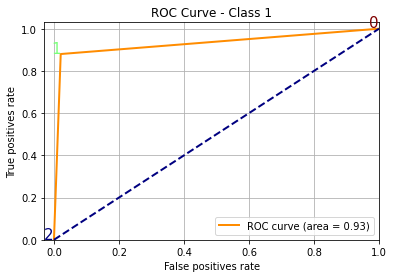

In [84]:
#ROC AND AUC
import sklearn
import matplotlib.pyplot as plt
def plot_roc(labels, predictions, positive_label, thresholds_every=10, title=''):
  # fp: false positive rates. tp: true positive rates
  fp, tp, thresholds = sklearn.metrics.roc_curve(labels, predictions, pos_label=positive_label)
  roc_auc = sklearn.metrics.auc(fp, tp)

  #figure(figsize=(16, 16))
  plt.plot(fp, tp, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=2, color='darkorange')
  plt.plot([0, 1], [0, 1], color='navy', linestyle='--', linewidth=2)
  plt.xlabel('False positives rate')
  plt.ylabel('True positives rate')
  plt.xlim([-0.03, 1.0])
  plt.ylim([0.0, 1.03])
  plt.title(title)
  plt.legend(loc="lower right")
  plt.grid(True)

  # plot some thresholds
  thresholdsLength = len(thresholds)
  colorMap=plt.get_cmap('jet', thresholdsLength)
  for i in range(0, thresholdsLength, thresholds_every):
    threshold_value_with_max_four_decimals = str(thresholds[i])[:5]
    plt.text(fp[i] - 0.03, tp[i] + 0.005, threshold_value_with_max_four_decimals, fontdict={'size': 15}, color=colorMap(i/thresholdsLength));
  plt.show()
plot_roc(y_test, preds, positive_label=1, thresholds_every=1, title="ROC Curve - Class 1")

In [87]:
## Use some scenarios to play with the hyper parameters

In [88]:
test_size = np.arange(0.01,0.5,0.01)
n_neighbors
parameters = {'n_neighbors':np.arange(1,50,1), 'weights':['uniform', 'distance']}

NameError: name 'n_neighbors' is not defined